In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss,confusion_matrix,classification_report,roc_curve,auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from imblearn.over_sampling import SMOTE
from sklearn.utils.fixes import signature
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
year1 = pd.read_csv('/Users/viralpandey/Downloads/Data/bankruptcy/1year.csv')
year2 = pd.read_csv('/Users/viralpandey/Downloads/Data/bankruptcy/2year.csv')
year3 = pd.read_csv('/Users/viralpandey/Downloads/Data/bankruptcy/3year.csv')
year4 = pd.read_csv('/Users/viralpandey/Downloads/Data/bankruptcy/4year.csv')
year5 = pd.read_csv('/Users/viralpandey/Downloads/Data/bankruptcy/5year.csv')

In [3]:
year1.head()

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,...,0.121960,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,2,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,...,0.121300,0.42002,0.85300,0,4.1486,3.2732,107.350,3.4,60.987,0
2,3,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,...,0.241140,0.81774,0.76599,0.69484,4.9909,3.951,134.270,2.7185,5.2078,0
3,4,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,5,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,...,0.134850,0.48431,0.86515,0.12444,6.3985,4.3158,127.210,2.8692,7.898,0


In [4]:
year1 = year1.drop(['id'], axis = 1)
year2 = year2.drop(['id'], axis = 1)
year3 = year3.drop(['id'], axis = 1)
year4 = year4.drop(['id'], axis = 1)
year5 = year5.drop(['id'], axis = 1)

In [5]:
years = [year1, year2, year3, year4, year5]
for i in range(len(years)):
    years[i] = years[i].replace('?', np.nan)

# Converting data types of each columns accordingly

In [6]:
def convert_columns_type_float(dfs):
    for i in range(5):
        index = 1
        while(index<=63):
            colname = dfs[i].columns[index]
            col = getattr(dfs[i], colname)
            dfs[i][colname] = col.astype('float')
            index+=1
        colname = dfs[i].columns[64]
        col = getattr(dfs[i], colname)
        dfs[i][colname] = col.astype('category')       
    return dfs
            
years = convert_columns_type_float(years)

# Handling missing values using mean imputation

In [7]:
def perform_mean_imputation(dfs):
    # Construct an imputer with strategy as 'mean', to mean-impute along the columns
    imputer = Imputer(missing_values= np.nan, strategy='mean', axis=0)
    mean_imputed_dfs = [pd.DataFrame(imputer.fit_transform(df)) for df in dfs]
    for i in range(len(dfs)):
        mean_imputed_dfs[i].columns = dfs[i].columns   
    return mean_imputed_dfs

years = perform_mean_imputation(years)

In [8]:
for i in range(5):
    print(years[i].isnull().values.any())

False
False
False
False
False


# Dropping Highly Correlated columns

In [9]:
for i in range(5):
    years[i] = years[i].drop(['Attr19', 'Attr20','Attr23', 
                             'Attr30','Attr31','Attr39', 
                             'Attr42','Attr43','Attr44', 
                             'Attr49','Attr56','Attr58','Attr62'], axis=1)

In [10]:
for i in range(5):
    print(years[i].shape)

(7027, 52)
(10173, 52)
(10503, 52)
(9792, 52)
(5910, 52)


# Performing logistic regression on mean imputed data

In [11]:
year1train, year1val = train_test_split(years[0], test_size=0.2, random_state=2018)
year2train, year2val = train_test_split(years[1], test_size=0.2, random_state=2018)
year3train, year3val = train_test_split(years[2], test_size=0.2, random_state=2018)
year4train, year4val = train_test_split(years[3], test_size=0.2, random_state=2018)
year5train, year5val = train_test_split(years[4], test_size=0.2, random_state=2018)

yearstrain = [year1train, year2train, year3train, year4train, year5train]
yearsval = [year1val, year2val, year3val, year4val, year5val]

In [12]:
classyear1train = pd.DataFrame(yearstrain[0].pop('class').values)
classyear2train = pd.DataFrame(yearstrain[1].pop('class').values)
classyear3train = pd.DataFrame(yearstrain[2].pop('class').values)
classyear4train = pd.DataFrame(yearstrain[3].pop('class').values)
classyear5train = pd.DataFrame(yearstrain[4].pop('class').values)

classyear1val = pd.DataFrame(yearsval[0].pop('class').values)
classyear2val = pd.DataFrame(yearsval[1].pop('class').values)
classyear3val = pd.DataFrame(yearsval[2].pop('class').values)
classyear4val = pd.DataFrame(yearsval[3].pop('class').values)
classyear5val = pd.DataFrame(yearsval[4].pop('class').values)

In [13]:
for i in range(5):
    yearstrain[i] = preprocessing.normalize(yearstrain[i])
    yearsval[i] = preprocessing.normalize(yearsval[i])

In [14]:
classtrain = [classyear1train, classyear2train, classyear3train, classyear4train, classyear5train]
classval = [classyear1val, classyear2val, classyear3val, classyear4val, classyear5val]

for i in range(5):
    classtrain[i].columns = ['class']
    classval[i].columns = ['class']

In [15]:
logisticModel = LogisticRegression(penalty = 'l1', C=0.5)

In [16]:
predictions=[]
avg_score = []
for i in range(5):
    logisticModel.fit(yearstrain[i], classtrain[i])
    predictions.append(logisticModel.predict(yearsval[i]))
    avg_score.append(average_precision_score(classval[i], predictions[i]))
    print("Classification report for Year",i+1)
    print(classification_report(classval[i], predictions[i]))

Classification report for Year 1
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1359
         1.0       0.00      0.00      0.00        47

   micro avg       0.97      0.97      0.97      1406
   macro avg       0.48      0.50      0.49      1406
weighted avg       0.93      0.97      0.95      1406

Classification report for Year 2
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1959
         1.0       0.00      0.00      0.00        76

   micro avg       0.96      0.96      0.96      2035
   macro avg       0.48      0.50      0.49      2035
weighted avg       0.93      0.96      0.94      2035

Classification report for Year 3
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      2014
         1.0       0.00      0.00      0.00        87

   micro avg       0.96      0.96      0.96      2101
   macro avg       0.48      

# Performing SMOTE to handle class imbalance

In [17]:
count0, count1 = 0, 0
for x in classtrain[0]['class']:
    if x == 0:
        count0 += 1
    else:
        count1 += 1       
print("Before OverSampling, counts of label '1':", count1)
print("Before OverSampling, counts of label '0':", count0)

Before OverSampling, counts of label '1': 224
Before OverSampling, counts of label '0': 5397


In [18]:
sm = SMOTE(random_state=2)
smote_year1train, smote_class1train = sm.fit_sample(yearstrain[0], classtrain[0].values)
smote_year2train, smote_class2train = sm.fit_sample(yearstrain[1], classtrain[1].values)
smote_year3train, smote_class3train = sm.fit_sample(yearstrain[2], classtrain[2].values)
smote_year4train, smote_class4train = sm.fit_sample(yearstrain[3], classtrain[3].values)
smote_year5train, smote_class5train = sm.fit_sample(yearstrain[4], classtrain[4].values)

smote_yearstrain = [smote_year1train, smote_year2train, smote_year3train, smote_year4train, smote_year5train]
smote_classtrain = [smote_class1train, smote_class2train, smote_class3train, smote_class4train, smote_class5train]

In [19]:
for i in range(5):
    print('After OverSampling, the shape of year ',i+1,' train set:', smote_yearstrain[i].shape)
    print('After OverSampling, the shape of year ',i+1,' class set:', smote_classtrain[i].shape)

    print("After OverSampling, counts of label '1': {}".format(np.sum(smote_classtrain[i]==1)))
    print("After OverSampling, counts of label '0': {}".format(np.sum(smote_classtrain[i]==0)))
    

After OverSampling, the shape of year  1  train set: (10794, 51)
After OverSampling, the shape of year  1  class set: (10794,)
After OverSampling, counts of label '1': 5397
After OverSampling, counts of label '0': 5397
After OverSampling, the shape of year  2  train set: (15628, 51)
After OverSampling, the shape of year  2  class set: (15628,)
After OverSampling, counts of label '1': 7814
After OverSampling, counts of label '0': 7814
After OverSampling, the shape of year  3  train set: (15988, 51)
After OverSampling, the shape of year  3  class set: (15988,)
After OverSampling, counts of label '1': 7994
After OverSampling, counts of label '0': 7994
After OverSampling, the shape of year  4  train set: (14826, 51)
After OverSampling, the shape of year  4  class set: (14826,)
After OverSampling, counts of label '1': 7413
After OverSampling, counts of label '0': 7413
After OverSampling, the shape of year  5  train set: (8788, 51)
After OverSampling, the shape of year  5  class set: (8788,)

# Fitting logistic regression on oversampled data using SMOTE

In [20]:
smote_predictions=[]
smote_avg_score = []
for i in range(5):
    logisticModel.fit(smote_yearstrain[i], smote_classtrain[i])
    smote_predictions.append(logisticModel.predict(yearsval[i]))
    smote_avg_score.append(f1_score(classval[i], smote_predictions[i]))
    print("Classification report for Year",i+1)
    print(classification_report(classval[i],smote_predictions[i]))

Classification report for Year 1
              precision    recall  f1-score   support

         0.0       0.98      0.74      0.84      1359
         1.0       0.08      0.64      0.14        47

   micro avg       0.73      0.73      0.73      1406
   macro avg       0.53      0.69      0.49      1406
weighted avg       0.95      0.73      0.82      1406

Classification report for Year 2
              precision    recall  f1-score   support

         0.0       0.98      0.65      0.78      1959
         1.0       0.06      0.59      0.11        76

   micro avg       0.64      0.64      0.64      2035
   macro avg       0.52      0.62      0.44      2035
weighted avg       0.94      0.64      0.75      2035

Classification report for Year 3
              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83      2014
         1.0       0.07      0.49      0.12        87

   micro avg       0.71      0.71      0.71      2101
   macro avg       0.52      

# No improvement in the model

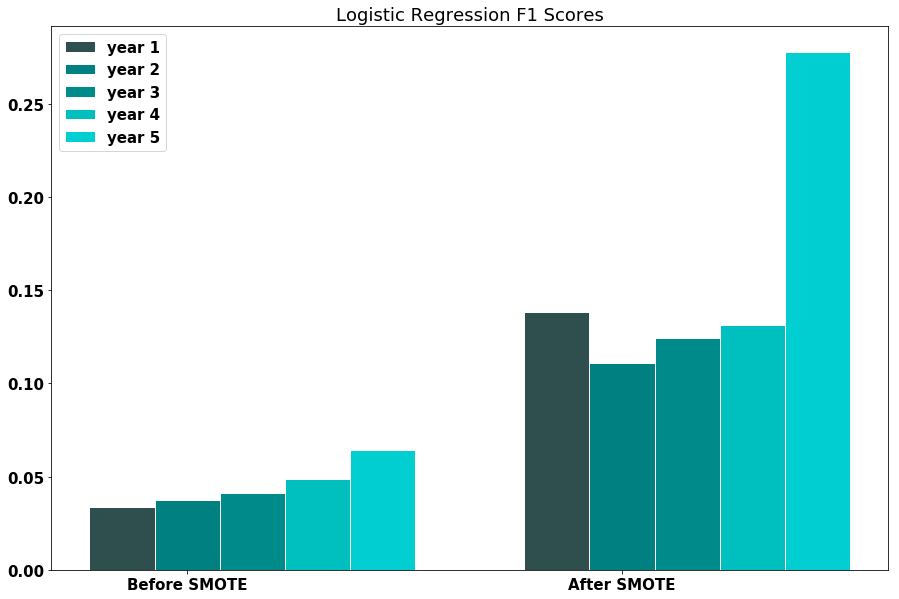

In [21]:
bars = []
rx = []
barWidth = 0.15

for i in range(5):
    bars.append([avg_score[i], smote_avg_score[i]])
    if i==0:
        rx.append(np.arange(len(bars[0])))
    else:
        rx.append([x + barWidth for x in rx[i-1]])
        font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : '15'}

# Make the plot
plt.figure(figsize = (15, 10))
plt.rc('font', **font)
plt.bar(rx[0], bars[0], color='darkslategrey', width=barWidth, edgecolor='white', label='year 1')
plt.bar(rx[1], bars[1], color='teal', width=barWidth, edgecolor='white', label='year 2')
plt.bar(rx[2], bars[2], color='darkcyan', width=barWidth, edgecolor='white', label='year 3')
plt.bar(rx[3], bars[3], color='c', width=barWidth, edgecolor='white', label='year 4')
plt.bar(rx[4], bars[4], color='darkturquoise', width=barWidth, edgecolor='white', label='year 5')
 
# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(bars[0]))], ['Before SMOTE', 'After SMOTE'])
 
# Create legend & Show graphic
plt.legend(loc = 'upper left')
plt.title('Logistic Regression F1 Scores')
plt.show()

In [22]:
avg_score

[0.033428165007112376,
 0.03734643734643735,
 0.04140885292717753,
 0.04849412965798877,
 0.06429780033840947]

In [23]:
smote_avg_score

[0.13856812933025403,
 0.1107011070110701,
 0.12445730824891463,
 0.13129770992366413,
 0.27777777777777773]

In [24]:
l2_smote_predictions=[]
l2_smote_avg_score = []
logisticModel2 = LogisticRegression(penalty = 'l2', C=0.5)
for i in range(5):
    logisticModel2.fit(smote_yearstrain[i], smote_classtrain[i])
    l2_smote_predictions.append(logisticModel2.predict(yearsval[i]))
    l2_smote_avg_score.append(average_precision_score(classval[i], l2_smote_predictions[i]))

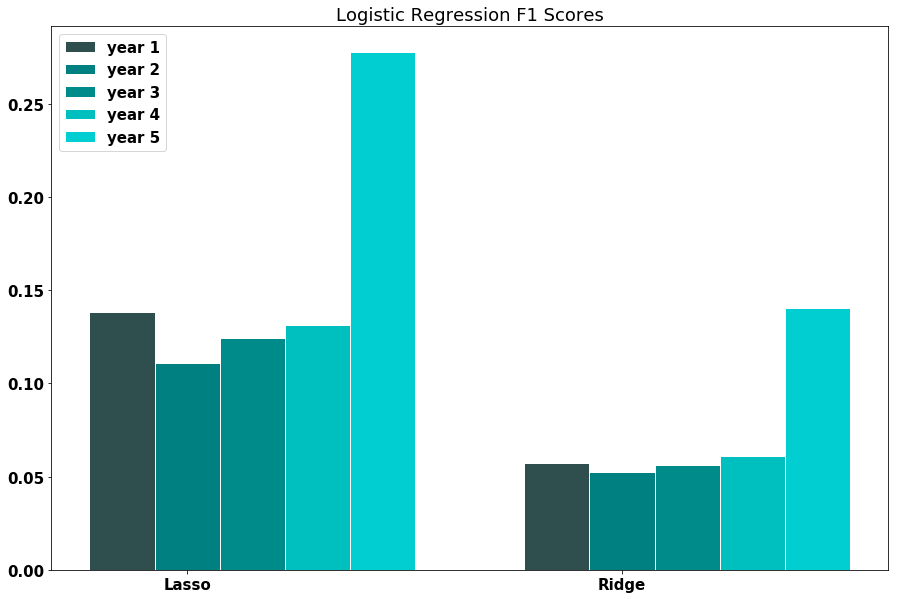

In [25]:
l2_bars = []
rx = []
barWidth = 0.15
for i in range(5):
    l2_bars.append([smote_avg_score[i], l2_smote_avg_score[i]])
    if i==0:
        rx.append(np.arange(len(l2_bars[0])))
    else:
        rx.append([x + barWidth for x in rx[i-1]])

        font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : '15'}


# Make the plot
plt.figure(figsize = (15, 10))
plt.rc('font', **font)
plt.bar(rx[0], l2_bars[0], color='darkslategrey', width=barWidth, edgecolor='white', label='year 1')
plt.bar(rx[1], l2_bars[1], color='teal', width=barWidth, edgecolor='white', label='year 2')
plt.bar(rx[2], l2_bars[2], color='darkcyan', width=barWidth, edgecolor='white', label='year 3')
plt.bar(rx[3], l2_bars[3], color='c', width=barWidth, edgecolor='white', label='year 4')
plt.bar(rx[4], l2_bars[4], color='darkturquoise', width=barWidth, edgecolor='white', label='year 5')
 
# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(l2_bars[0]))], ['Lasso', 'Ridge'])
 
# Create legend & Show graphic
plt.legend(loc = 'upper left')
plt.title('Logistic Regression F1 Scores')
plt.show()

In [26]:
smote_avg_score

[0.13856812933025403,
 0.1107011070110701,
 0.12445730824891463,
 0.13129770992366413,
 0.27777777777777773]

In [27]:
l2_smote_avg_score

[0.057295274835901404,
 0.05262243006603909,
 0.05642299863275366,
 0.061176108730568717,
 0.14039687866440895]

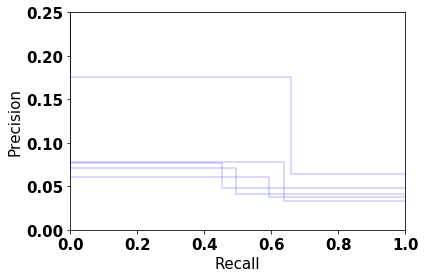

In [28]:
precision = []
recall = []
for i in range(5):
    a, b, _ = precision_recall_curve(classval[i], smote_predictions[i])
    precision.append(a)
    recall.append(b)

# In matplotlib < plt.figure(20,10)
for i in range(5):
    step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
    plt.step(recall[i], precision[i], color='b', alpha=0.2,where='post')
    #plt.fill_between(recall[i], precision[i], alpha=0.2, color='b', **step_kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 0.25])
    plt.xlim([0.0, 1.0])
    
    #plt.figure(20, 10)
# plt.step(recall, precision, color='b', alpha=0.2,where='post')
# plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])
# plt.title('Precision Recall Curve: Avg precision-recall score={0:0.2f}'.format(average_precision))

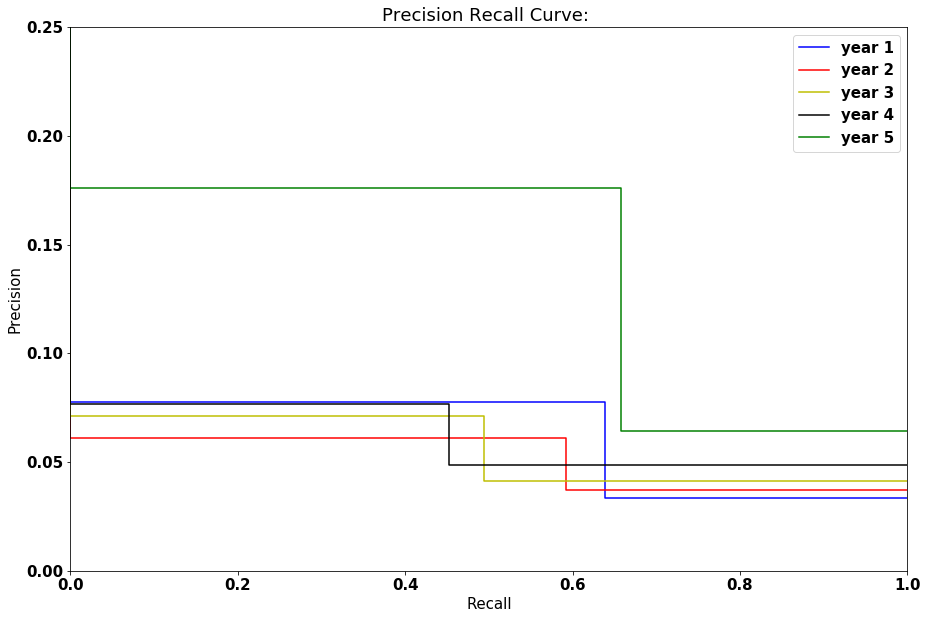

In [29]:
fig, ax = plt.subplots(figsize = (15, 10))
ax.step(recall[0], precision[0], color='b',where='post', label = "year 1")
ax.step(recall[1], precision[1], color='r',where='post', label = "year 2")
ax.step(recall[2], precision[2], color='y',where='post', label = "year 3")
ax.step(recall[3], precision[3], color='black',where='post', label = "year 4")
ax.step(recall[4], precision[4], color='g',where='post', label = "year 5")
# ax.fill(recall[0], precision[0], 'b', 
#         recall[1], precision[1], 'r',
#         recall[2], precision[2], 'y',
#         recall[3], precision[3], 'black',
#         recall[4], precision[4], 'g',
#         alpha=0.3)
plt.legend(loc = 'upper right')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 0.25])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall Curve: ')
plt.show()

In [30]:
viz = PrecisionRecallCurve()

NameError: name 'PrecisionRecallCurve' is not defined